<h1> Importing Required Packages

In [ ]:
import pandas as pd #Basic Data Science stuff
import numpy as np #Another basic ds package for faster computations
import math #Used to turn floats into integer for specific instances

from sklearn.model_selection import train_test_split #Used for training and fitting models
from sklearn.metrics import mean_squared_error #Required as specified by the instructions
from sklearn.metrics import r2_score #Required as specified by the instructions

#Regression for prediction algorithms.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso #linear_model.Lasso

<h1> Loading the dataset

In [ ]:
url = "https://raw.githubusercontent.com/ereilly89/chicago-housing-rental-app/master/datasets/listingTrainingData_Header.csv"
#Additonally, you can get the cleansed data set instead of the original file: https://github.com/ereilly89/chicago-housing-rental-app/blob/master/datasets/listing_training_cleaned.csv.
#https://github.com/ereilly89/chicago-housing-rental-app/blob/master/datasets/onehotencode.py
#Check the url above, as it can be inferred that the actual raw file is listing_training_cleaned.csv.
#Ergo, to save time and minimize any pre-processing, we can also do this option.
listingDF = pd.read_csv(url)
listingDF.head()

,price,latitude,longitude,bathrooms,bedrooms,beds,Albany Park,Archer Heights,Armour Square,Ashburn,...,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,Entire home/apt,Hotel room,Private room,Shared room
0,65.0,41.78790,-87.58780,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,105.0,41.85495,-87.69696,1.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60.0,41.90289,-87.68182,1.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,66.0,41.91769,-87.63788,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,22.0,41.79612,-87.59261,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1> Exploring the dataset and Preprocessing data

Now, let's proceed to gather some basic information through the use of shape, describe, value_counts, isnull, and etc.

In [ ]:
listingDF.shape
#That's a lot of columns, and it's not really relevant so as we move forward, we should remove most of them in my opinion.

(6295, 87)

In [ ]:
listingDF.describe()
#In here, we get the count, mean, standard deviation, minimum, and maximum of each of the columns to see if there's anything worthwhile looking into.

,price,latitude,longitude,bathrooms,bedrooms,beds,Albany Park,Archer Heights,Armour Square,Ashburn,...,West Garfield Park,West Lawn,West Pullman,West Ridge,West Town,Woodlawn,Entire home/apt,Hotel room,Private room,Shared room
count,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,...,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000,6295.000000
mean,152.447339,41.898480,-87.663560,1.379697,1.758251,2.143177,0.010326,0.000794,0.011755,0.001747,...,0.002859,0.001589,0.000159,0.011597,0.110882,0.014138,0.688324,0.011755,0.285306,0.014615
std,371.639943,0.058681,0.042821,0.914902,1.186112,1.823913,0.101097,0.028174,0.107792,0.041769,...,0.053401,0.039828,0.012604,0.107069,0.314010,0.118070,0.463215,0.107792,0.451596,0.120014
min,0.000000,41.651560,-87.934340,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,41.871925,-87.687160,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,41.900640,-87.659690,1.000000,1.758251,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,155.000000,41.939175,-87.632710,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,10000.000000,42.022590,-87.525180,42.000000,50.000000,50.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
listingDF.isnull().sum()
#We check if there's any missing values so that we have to either remove those rows or impute them.
#Fortunately, looks like there is no missing data.

price              0
latitude           0
longitude          0
bathrooms          0
bedrooms           0
                  ..
Woodlawn           0
Entire home/apt    0
Hotel room         0
Private room       0
Shared room        0
Length: 87, dtype: int64

In [ ]:
#Now, we proceed with checking the dataset if it has any outliers. There are two common methods used to detect outliers, one is using the interquartile range, and the other is based on z-score.
#As such, I'll apply both of them and make judgements.

def outlierIQR(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lowerBound = Q1 * 1.5 * IQR
    upperBound = Q3 * 1.5 * IQR

    outliers = [val for val in data if val > upperBound or val < lowerBound]
    return outliers

def outlierZScore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(value - mean) / std for value in data]

    outliers = [data[i] for i, z_score in enumerate(z_scores) if abs(z_score) > threshold]

    return outliers

In [ ]:
#The only variable we can test if there's any outlier or not is the price column
outPrice = outlierIQR(listingDF['price'])
print(f'IQR Outlier Results: {len(outPrice)}') #Yeah this is not right.

outPrice2 = outlierZScore(listingDF['price'])
print(f'Z-Score Outlier Results: {len(outPrice2)}')
#With this, we can say that there are 28 outliers. Rather than imputing the values, i think it's best to simply remove the rows of outliers to save some time.
print(f'Outliers: {outPrice2}')

IQR Outlier Results: 6288
Z-Score Outlier Results: 28
Outliers: [1576.0, 10000.0, 1999.0, 1400.0, 9999.0, 3429.0, 9999.0, 3000.0, 1500.0, 3690.0, 2141.0, 2450.0, 2000.0, 1486.0, 1921.0, 2253.0, 1500.0, 2200.0, 9000.0, 9999.0, 9999.0, 9999.0, 3500.0, 1499.0, 1499.0, 1556.0, 3070.0, 1500.0]


In [ ]:
print("Before: \n",listingDF['price'].value_counts())
print(listingDF['price'].shape)
removedOutlierDF = listingDF[listingDF.price.isin(outPrice2)==False]
print("After: \n", removedOutlierDF['price'].value_counts())
print(removedOutlierDF['price'].shape)

#Sure enough, 6295 (Total rows) - 28 (Outliers) = 6267.
#Looking at the data manually (Although I did just sorted it in asc. and desc. manner, we can see that there's one final outlier, the price of 0 should not exist!Ergo I'll be dropping that too)
removedOutlierDF = removedOutlierDF[listingDF.price!=0]
print("After(2): \n", removedOutlierDF['price'].value_counts())
print(removedOutlierDF['price'].shape)

Before: 
 75.0      140
50.0      140
100.0     116
80.0      116
150.0     114
         ... 
1086.0      1
1034.0      1
1999.0      1
464.0       1
306.0       1
Name: price, Length: 492, dtype: int64
(6295,)
After: 
 75.0     140
50.0     140
80.0     116
100.0    116
150.0    114
        ... 
372.0      1
383.0      1
468.0      1
254.0      1
306.0      1
Name: price, Length: 471, dtype: int64
(6267,)
After(2): 
 75.0     140
50.0     140
80.0     116
100.0    116
150.0    114
        ... 
372.0      1
383.0      1
468.0      1
254.0      1
306.0      1
Name: price, Length: 470, dtype: int64
(6266,)


<ipython-input-174-96c743aa3723>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  removedOutlierDF = removedOutlierDF[listingDF.price!=0]


In [ ]:
#Now, let's proceed with dropping all irrelevant columns. Most of the columns in this dataset is specific locations/areas/neighborhood that has a boolean value, along with the columns of Entire home/apt, Hotel room, Private room, and Shared room.
#As such, the columns we should keep are the 4 aforementioned room types, price, bathroom, beds, and bedrooms. Additionally, we have to preprocess the data of bathroom, beds, and bedrooms as some of them are in float which is questionable. As such, we'll
#use Math.floor() or something close to round them down.
tempDF = removedOutlierDF[['price','bathrooms','bedrooms','beds','Entire home/apt', 'Hotel room', 'Private room', 'Shared room']]
print(tempDF.head(14))

convertingHeaders = ['bathrooms', 'bedrooms', 'beds']


for col in convertingHeaders:
    tempDF.loc[:, col] = tempDF.loc[:, col].apply(math.floor)

print(tempDF.head(14))

cleansedDF = tempDF

    price  bathrooms  bedrooms  beds  Entire home/apt  Hotel room  \
0    65.0        1.0       1.0   1.0              0.0         0.0   
1   105.0        1.0       3.0   5.0              1.0         0.0   
2    60.0        1.0       3.0   4.0              1.0         0.0   
3    66.0        1.0       1.0   2.0              1.0         0.0   
4    22.0        1.0       1.0   1.0              0.0         0.0   
5   115.0        1.0       2.0   2.0              1.0         0.0   
6   289.0        1.0       1.0   2.0              0.0         0.0   
7    99.0        2.0       2.0   2.0              1.0         0.0   
8   113.0        1.0       1.0   1.0              1.0         0.0   
9    94.0        1.0       2.0   0.0              1.0         0.0   
10   97.0        2.0       3.0   3.0              1.0         0.0   
11   77.0        1.5       1.0   1.0              0.0         0.0   
12   75.0        1.0       1.0   1.0              0.0         0.0   
13   65.0        1.0       1.0   1

<ipython-input-175-8f6bde0f3e93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDF.loc[:, col] = tempDF.loc[:, col].apply(math.floor)
<ipython-input-175-8f6bde0f3e93>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tempDF.loc[:, col] = tempDF.loc[:, col].apply(math.floor)


In [ ]:
#We're finally ready with our dataset. Taking a final look at our headers, we can't do classification (even if we could turn the 4 room types into 1 column as the price, bathroom, beds, and bedrooms are not sufficient information to classify which room type)
#Therefore, we will be using prediction algorithms to use the inputs of bathrooms, bedrooms, beds, the 4 room types to determine the price.
X = cleansedDF.drop('price', axis=1)
y = cleansedDF['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h1> Building the Model

In [ ]:
#Using LinearRegression
lrModel = LinearRegression()

#Using Lasso
lassoModel = Lasso()

In [ ]:
lrModel.fit(X_train, y_train)

LinearRegression()

In [ ]:
lassoModel.fit(X_train, y_train)

Lasso()

In [ ]:
lrPred = lrModel.predict(X_test)
lrPred

array([ 67.8125, 146.8125, 195.5   , ..., 146.8125, 146.8125, 146.8125])

<h1> Model Prediction

In [ ]:
lr_pred = lrModel.predict(X_test)
lr_pred

array([ 67.8125, 146.8125, 195.5   , ..., 146.8125, 146.8125, 146.8125])

In [ ]:
lasso_pred = lassoModel.predict(X_test)
lasso_pred

array([ 70.15894405, 146.55887826, 197.51153235, ..., 146.55887826,
       146.55887826, 146.55887826])

<h1> Model Evaluation
</h1>
These are the results!

In [ ]:
print("Coefficient for Linear Regression:", lrModel.coef_)
lrMSE = mean_squared_error(y_test, lr_pred)
print("MSE for Linear Regression:", lrMSE)
lrRMSE = mean_squared_error(y_test, lr_pred, squared=False)
print("RMSE for Linear Regression:", lrRMSE)
lrR2 = r2_score(y_test, lr_pred)
print("R2 for Linear Regression:", lrR2)

Coefficient for Linear Regression: [4.09110299e+01 3.14772340e+01 8.59644968e+00 5.34474366e+14
 5.34474366e+14 5.34474366e+14 5.34474366e+14]
MSE for Linear Regression: 11649.380109291887
RMSE for Linear Regression: 107.93229409816085
R2 for Linear Regression: 0.29339887237824325


In [ ]:
print("Coefficient for Lasso:", lassoModel.coef_)
lassoMSE = mean_squared_error(y_test, lasso_pred)
print("MSE for Lasso:", lassoMSE)
lassoRMSE = mean_squared_error(y_test, lr_pred, squared=False)
print("RMSE for Lasso:", lassoRMSE)
lassoR2 = r2_score(y_test, lasso_pred)
print("R2 for Lasso:", lassoR2)

Coefficient for Lasso: [37.49058651 32.29193608  9.33035901 44.10799813  0.         -0.
 -0.        ]
MSE for Lasso: 11627.881494767782
RMSE for Lasso: 107.93229409816085
R2 for Lasso: 0.2947028855637108


<h2> Von Derwin Caibigan - BM1 - M2FA2 </h2>

<h3>References</h3>
https://www.bing.com/ck/a?!&&p=94f58967737a5554JmltdHM9MTY4ODQyODgwMCZpZ3VpZD0wYzlkNjM4Yi0zNDQ1LTZiN2ItMWJiNC03MGNmMzVkODZhNTcmaW5zaWQ9NTE3OQ&ptn=3&hsh=3&fclid=0c9d638b-3445-6b7b-1bb4-70cf35d86a57&psq=predictions+data+science+python+listings&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3N0ZXAtYnktc3RlcC1ndWlkZS1idWlsZGluZy1hLXByZWRpY3Rpb24tbW9kZWwtaW4tcHl0aG9uLWFjNDQxZThiOWU4Yg&ntb=1
https://scikit-learn.org/stable/modules/linear_model.html#lasso
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#linear-regression-example
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://www.bing.com/ck/a?!&&p=76bb391b0b37103bJmltdHM9MTY4ODQyODgwMCZpZ3VpZD0wYzlkNjM4Yi0zNDQ1LTZiN2ItMWJiNC03MGNmMzVkODZhNTcmaW5zaWQ9NTIwMg&ptn=3&hsh=3&fclid=0c9d638b-3445-6b7b-1bb4-70cf35d86a57&psq=predictions+data+science+python+listings&u=a1aHR0cHM6Ly9tYWNoaW5lbGVhcm5pbmdtYXN0ZXJ5LmNvbS9tYWtlLXByZWRpY3Rpb25zLXNjaWtpdC1sZWFybi8&ntb=1
https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one

<h1> Visualization

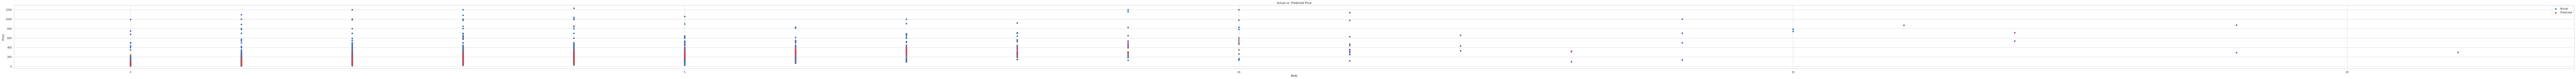

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['beds'], y_train, color='b', label='Actual')
plt.scatter(X_test['beds'], lr_pred, color='r', label='Predicted')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs. Predicted Price')
plt.show()